<a href="https://colab.research.google.com/github/rosemilca-Ing/Data-Analyst/blob/main/Forage_Simulation/%20Quantium/Quantium_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analytics**
## **Explore the power of data and its ability to power breakthrough possibilities for individuals, organisations and societies with Quantium.**

# **Title: "Quantium Virtual Internship - Retail Strategy and Analytics - Task 1"**

**This is a project from Forage.**
*   Creating and interpreting high-level summaries of the data
*   Finding outliers and removing these (if applicable)
*   Checking data formats and correcting (if applicable)  



**Datasets :**
1.   QVI_purchase_behaviour.csv
2.   QVI_purchase_behaviour.xlsx


**Data Analysys on customers Segment**

Now that the data is ready for analysis, we can define some metrics of interest to the client:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

We could also ask our data team for more information. Examples are:
- The customer's total spend over the period and total spend for each transaction
to understand what proportion of their grocery spend is on chips
- Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips


# **Task 1: Data preparation and customer analytics**

### **Load required libraries**

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Purchase Behaviour**

### **Analyse exploratoire des données**

In [3]:
purchase = pd.read_csv('QVI_purchase_behaviour.csv')
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
purchase.shape

(72637, 3)

In [5]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
purchase.describe( include=object)

,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637
unique,7,3
top,RETIREES,Mainstream
freq,14805,29245


In [7]:
purchase.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


**Commentaires :** Le jeu de données comporte 72 637 lignes et 3 colonnes : 	LYLTY_CARD_NBR, LIFESTAGE	et PREMIUM_CUSTOMER.

Il ne contient pas de valeurs nulles.

## **Transaction**

### **Analyse exploratoire des données**

In [8]:
transaction =pd.read_excel('QVI_transaction_data.xlsx')
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
transaction.shape

(264836, 8)

In [10]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


**Commentaires:** Les seules colonnes quantitatives sont : TOT_SALES	et PROD_QTY.

In [11]:
transaction[['TOT_SALES', 'PROD_QTY']].describe().round(2)

,TOT_SALES,PROD_QTY
count,264836.00,264836.00
mean,7.30,1.91
std,3.08,0.64
min,1.50,1.00
25%,5.40,2.00
50%,7.40,2.00
75%,9.20,2.00
max,650.00,200.00


In [12]:
transaction['PROD_NAME'].describe( )

,PROD_NAME
count,264836
unique,114
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304


In [13]:
transaction.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


**Convertissons la colonne DATE en format date. Pour Excel, on commene à calculer à partir de 1899-12-30.**

In [14]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'], origin='1899-12-30', unit='D')

In [15]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


**Commentaires:** Le jeu de données contient 26 4836 lignes et 8 colonnes: DATE, STORE_NBR, LYLTY_CARD_NBR,	TXN_ID,	PROD_NBR,	PROD_NAME,	PROD_QTY et	TOT_SALES.

La colonne DATE a été converti en format date.

Il n'ya pas de valeurs nulles.

###**Verifions si tous les noms des produits sont effectivement des chips**

In [16]:
# Obtenir les noms de produits distincts
product_names = transaction['PROD_NAME'].unique()

# Diviser les noms de produits en mots
all_words = []
for name in product_names:
    words = name.split()
    all_words.extend(words)

# Créer une série pandas avec tous les mots
product_words = pd.Series(all_words)

In [17]:
product_names.shape

(114,)

**Commentaires:** Il y a 114 noms de chips distincts. On procèdera à un nettoyage pour garder que les mots composés de lettres.

In [18]:
# Garder seulement les mots composés de lettres (a-z, A-Z)
clean_words = product_words[product_words.str.match("^[A-Za-z]+$")]

# Mettre en minuscules pour standardiser
clean_words = clean_words.str.lower()

# Compter les mots les plus fréquents
word_counts = clean_words.value_counts()
print(word_counts.head(20))


chips       21
smiths      16
cut         14
crinkle     14
kettle      13
salt        12
cheese      12
original    10
salsa        9
doritos      9
chip         9
corn         8
pringles     8
rrd          8
ww           7
chicken      7
sea          6
sour         6
thins        5
crisps       5
Name: count, dtype: int64


**Commentaires :** On remarque que Salsa figure parmi les mots. On va enlever de la liste des produits tous les produits contenant le mot Salsa, car ce ne sont pas des chips.

In [19]:
transaction= transaction[~transaction['PROD_NAME'].str.contains('Salsa', case=False)]

In [20]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### **Examinons les mots dans un nuage de mots**

In [21]:
# Liste de stopwords en anglais
stop_words = set(stopwords.words('english'))

In [22]:
# Enlever les mots trop courts et les stopwords
filtered_words = [
    word.lower() for word in clean_words
    if len(word) > 2 and word.lower() not in stop_words
]

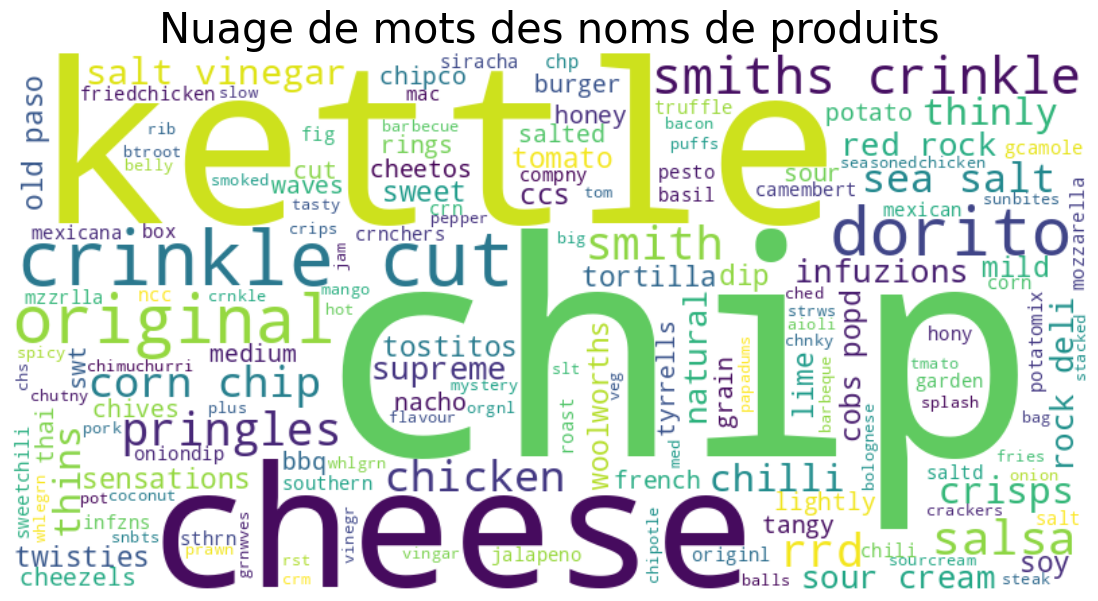

In [23]:
text = ' '.join(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des noms de produits', fontsize=30)
plt.show()


### **Trouvons les outliers**

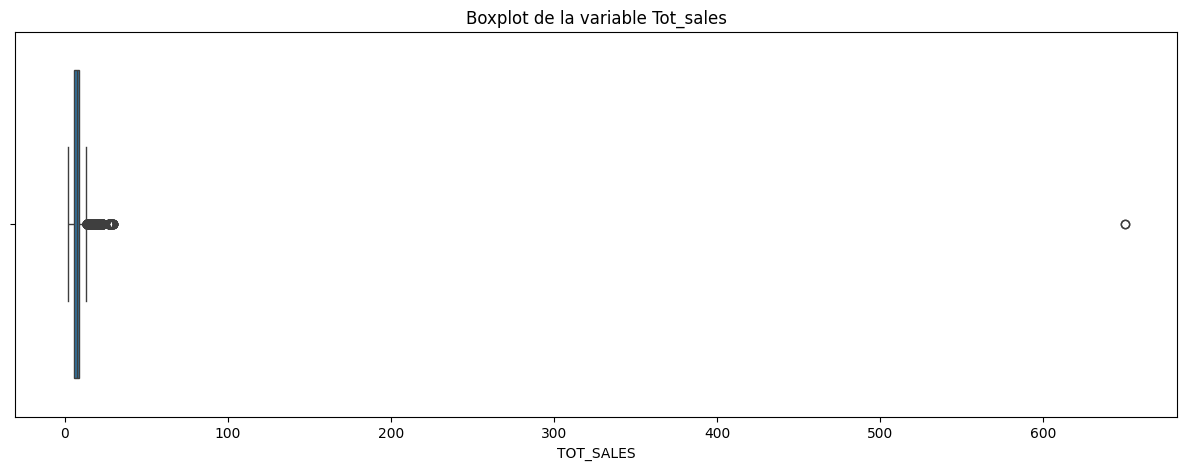

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(x=transaction['TOT_SALES'])
plt.title('Boxplot de la variable Tot_sales')
plt.show()

**Commentaires:** On a remarqué qu'il y a des outliers parmi les valeurs de Tot_sales.

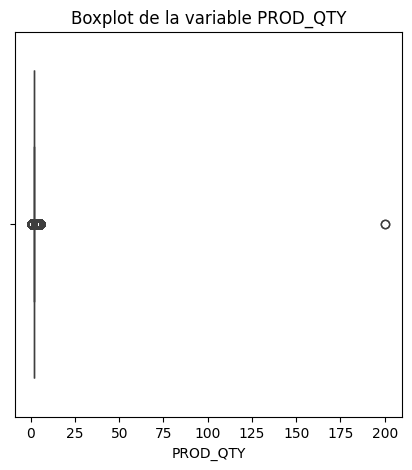

In [25]:
plt.figure(figsize=(5,5))
sns.boxplot(x=transaction['PROD_QTY'])
plt.title('Boxplot de la variable PROD_QTY')
plt.show()

**Commentaires:** On a remarqué qu'il y a des outliers parmi les valeurs de PROD_QTY. Peut-être que les outliers de la colonne PROD_QTY et de la colonne TOT_SALES sont liés ( PROD_QTY élevé => TOT_SALES élevé).

**Vérifions les lignes contenant ces outliers.**

In [26]:
transaction[transaction['PROD_QTY'] > 5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


**Commentaires:** On a trouvé deux lignes contenant les outliers. Il y a eu deux commandes de 200 produits.

**Vérifions si la même personne a effectué d'autres commandes.**

In [27]:
transaction[transaction['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


**Commentaires:** La personne a passé que ces 2 commandes.

 Pourquoi? Peut-être que c'est un client qui achète en gros pour revendre.

**Enlevons ces deux lignes du jeu de données.**

In [28]:
transaction = transaction[transaction['LYLTY_CARD_NBR']!=226000].copy()

###**Verifions s'il ya des dates manquantes**

In [29]:
transaction.groupby('DATE')['LYLTY_CARD_NBR'].count()

,LYLTY_CARD_NBR
DATE,
2018-07-01,663
2018-07-02,650
2018-07-03,674
2018-07-04,669
2018-07-05,660
...,...
2019-06-26,657
2019-06-27,669
2019-06-28,673


**Comentaires :** On a trouvé 364 dates, il devait y avoir 365. Il y en a une manquante, vérifions laquelle.

In [30]:
# Crée une séquence de dates quotidiennes / L'année s'établit du 2018-07-01 au 2019-06-30
all_dates = pd.DataFrame({'DATE': pd.date_range(start='2018-07-01', end='2019-06-30')})

In [31]:
#Compter le nombre de transactions par date
txn_per_day = transaction.groupby('DATE').size().reset_index(name='TXN_COUNT')

In [32]:
# Jointure pour inclure toutes les dates même celles qui manquent dans txn_per_day
full_data = all_dates.merge(txn_per_day, on='DATE', how='left')

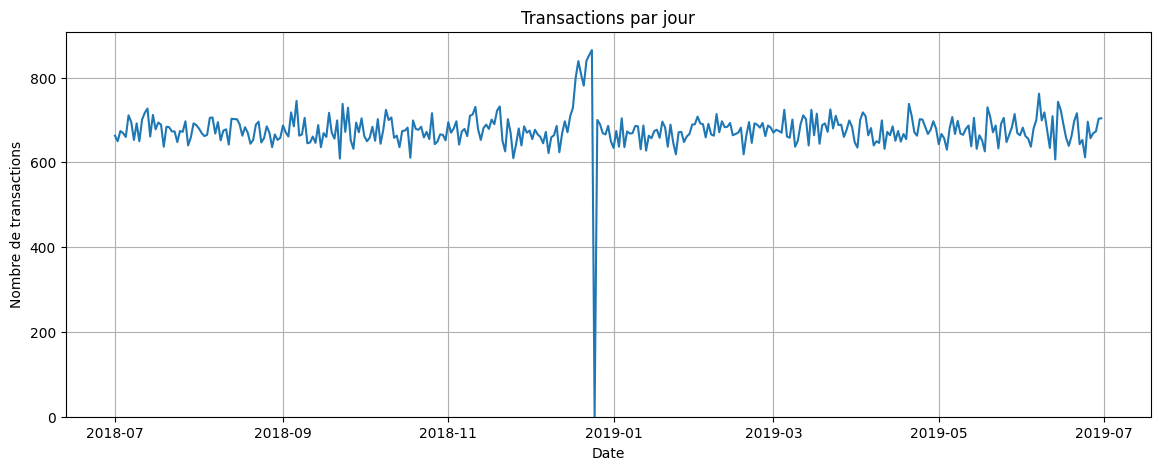

In [34]:
# On remplit les NaN par 0 pour le graphique
full_data['TXN_COUNT'] = full_data['TXN_COUNT'].fillna(0)

plt.figure(figsize=(14, 5))
plt.plot(full_data['DATE'], full_data['TXN_COUNT'])
plt.title("Transactions par jour")
plt.xlabel("Date")
plt.ylabel("Nombre de transactions")
plt.grid(True)
plt.ylim(bottom=0)
plt.show()


In [ ]:
full_data[full_data['TXN_COUNT']==0]

**Commmentaires :** Il y a une valeur 0 pour le 25 décembre. Les magasins sont généralemt fermés à cette date.


### **Brand of chips and pack size from PROD_NAME**

**Extrayons les tailles des paquets de chips**

In [35]:
# Prenons les tailles avec leurs unités de mesure (comme "200g" ou "12pack")
transaction['SIZE_INFO'] = transaction['PROD_NAME'].str.extract(r'(\d+\s?[a-zA-Z]+)')

transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_INFO
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g


In [36]:
transaction['SIZE_INFO'].value_counts().sort_values(ascending=False)

,count
SIZE_INFO,
175g,64929
150g,38705
134g,25102
110g,22387
170g,19983
165g,15297
330g,12540
380g,6416
270g,6285


**Commentaires:** La taille minimum est de 70g et la taille maximum de 380g. Cela semble raisonable.

**Nombre de transactions par taille de produit**

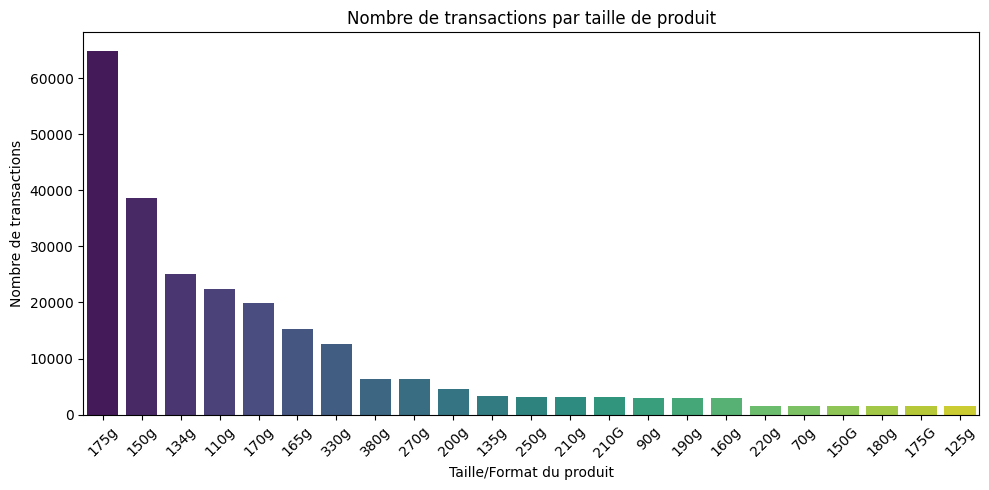

In [37]:
# Compter les transactions par size_info
size_counts = transaction['SIZE_INFO'].value_counts().reset_index()
size_counts.columns = ['SIZE_INFO', 'COUNT']


plt.figure(figsize=(10, 5))
sns.barplot(data=size_counts, x='SIZE_INFO', y='COUNT', palette='viridis', hue='SIZE_INFO')
plt.title("Nombre de transactions par taille de produit")
plt.xlabel("Taille/Format du produit")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Commentaires:** Les 5 tailles les plus vendus sont : 175g, 150g, 134g, 110g et 170g.

**Extrayons les noms de marques**

In [38]:
#Prennons le premier mot des noms des chips (Ils représentent les marques)
transaction['BRAND'] = transaction['PROD_NAME'].str.split().str[0]

In [39]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_INFO,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle


In [40]:
transaction['BRAND'].value_counts().sort_values(ascending=False)

,count
BRAND,
Kettle,41288
Smiths,27390
Pringles,25102
Doritos,22041
Thins,14075
RRD,11894
Infuzions,11057
WW,10320
Cobs,9693


**Red et RRD sont les mêmes marques, combinons les.**

In [41]:
transaction.loc[transaction['BRAND'] == 'Red', 'BRAND'] = 'RRD'

In [42]:
brand_counts = transaction['BRAND'].value_counts().reset_index()

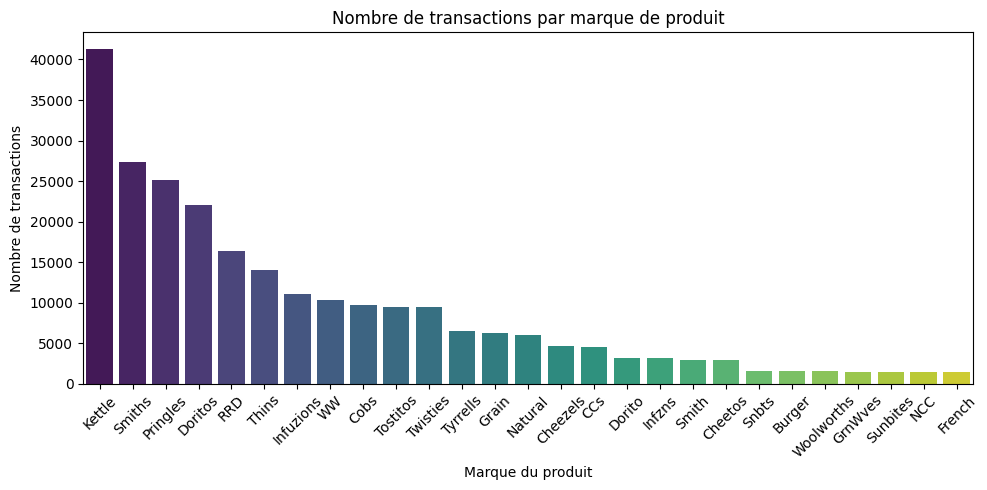

In [43]:
brand_counts.columns = ['BRAND', 'COUNT']

plt.figure(figsize=(10, 5))
sns.barplot(data=brand_counts, x='BRAND', y='COUNT', palette='viridis', hue='BRAND')
plt.title("Nombre de transactions par marque de produit")
plt.xlabel("Marque du produit")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Commentaires:** Les marques les plus venduse: Kettle, Smiths, Pringles et Doritos.

## **Merge transaction data to customer data**


**Faisons un merge pour avoir une dataframe ayant les clients et leurs transactions. Gardons que les transactions dont les données des clients sont disponibles.**

In [44]:
merged_data = transaction.merge(purchase, on='LYLTY_CARD_NBR', how='left')

In [45]:
# Trouver les lignes avec des valeurs nulles dans n'importe quelle colonne
null_rows = merged_data[merged_data.isnull().any(axis=1)]

print(null_rows.head())

Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, SIZE_INFO, BRAND, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


**Commentaires**: On est sûr qu'il n'y a pas de valeurs nulles.

## **Data analysis on customer segments**


Now that the data is ready for analysis, we can define some metrics of interest to the client:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

We could also ask our data team for more information. Examples are:
- The customer's total spend over the period and total spend for each transaction
to understand what proportion of their grocery spend is on chips
- Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips

**Total sales by LIFESTAGE and PREMIUM_CUSTOMER**

In [56]:
grouped_sales= merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER',])['TOT_SALES'].sum()
grouped_sales

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget               33345.70
                        Mainstream           84734.25
                        Premium              54443.85
NEW FAMILIES            Budget               20607.45
                        Mainstream           15979.70
                        Premium              10760.80
OLDER FAMILIES          Budget              156863.75
                        Mainstream           96413.55
                        Premium              75242.60
OLDER SINGLES/COUPLES   Budget              127833.60
                        Mainstream          124648.50
                        Premium             123537.55
RETIREES                Budget              105916.30
                        Mainstream          145168.95
                        Premium              91296.65
YOUNG FAMILIES          Budget              129717.95
                        Mainstream           86338.25
                        Premium              78571.70
YOUNG SINGLES/COUPLES   Budget               57122.10
                        Mainstream          147582.20
                        Premium              39052.30
Name: TOT_SALES, dtype: float64

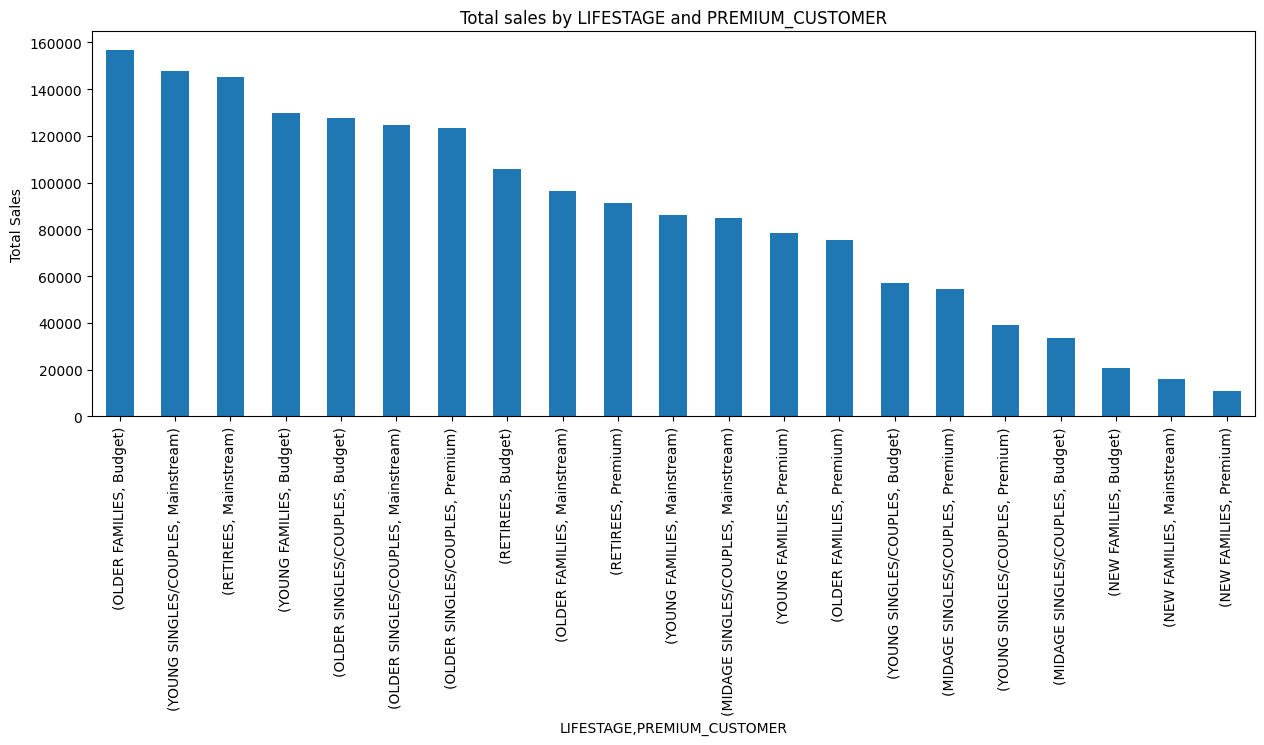

In [47]:
sorted_sales = grouped_sales.sort_values(ascending=False)

plt.figure(figsize=(15, 5))
sorted_sales.plot(kind='bar')
plt.title('Total sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.ylabel('Total Sales')
plt.show()

**Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is?**

**Commentaires:** Les ventes proviennent principalement des Older families-Budget, Young singles/couples-Mainstream et Retirees-Mainstream.

**Hypothèses possibles**

Il y a beaucoup de clients dans ces groupes, donc plus de monde = plus de ventes (hypothèse liée au volume de clients)

Les clients de ces groupes achètent plus de chips par personne → donc même s’ils ne sont pas très nombreux, ils consomment beaucoup (hypothèse liée au comportement d’achat)

**Voyons si la hausse des ventes est due au nombre de clients achetant des chips.**

In [48]:
nbr_customers = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()

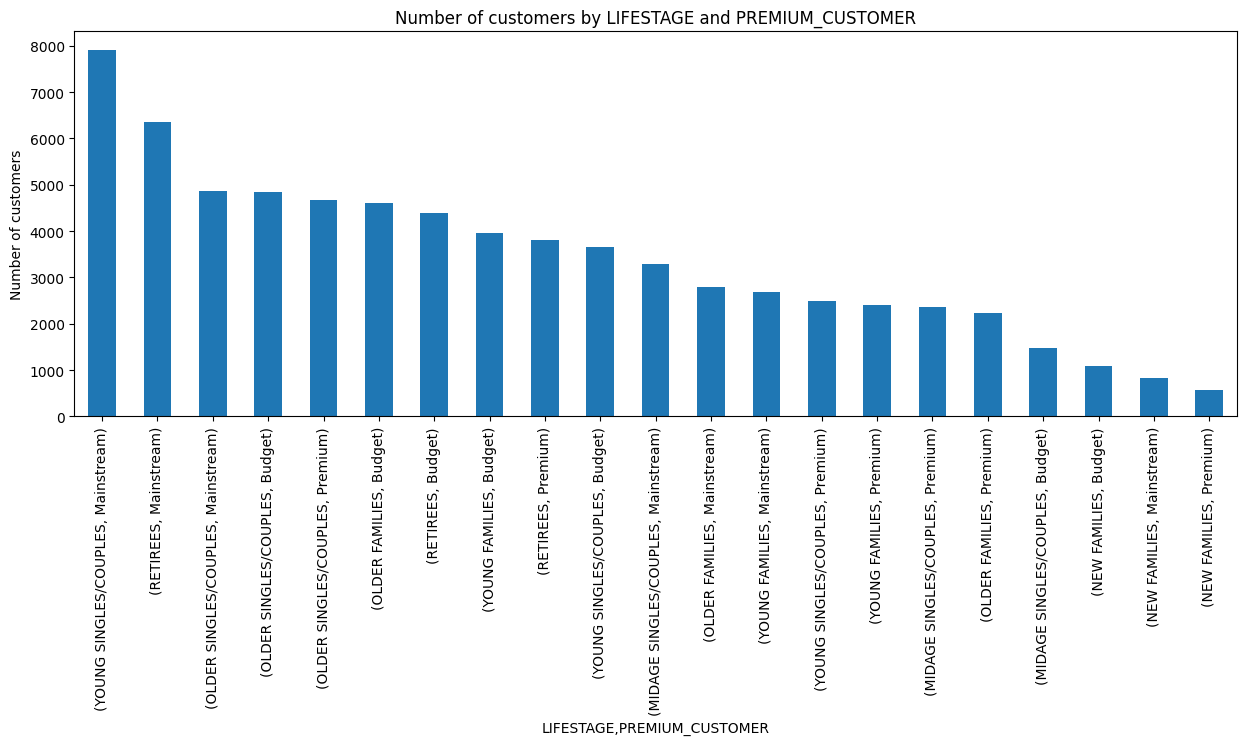

In [49]:
nbr_customers_sorted= nbr_customers.sort_values(ascending=False)

plt.figure(figsize=(15,5))
nbr_customers_sorted.plot(kind='bar')
plt.title('Number of customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.ylabel('Number of customers')
plt.show()

**Commentaires:** On remarque que les 3 catégories contenant plus de clients sont : Young singles/couples-Mainstream, Retirees-Mainstream et Older singles/couples-Mainstream.

Les ventes sont plus élevées dans ces groupes : Young singles/couples-Mainstream et Retirees-Mainstream car il y a tout simplement plus de clients qui achètent.

Par contre, pour le groupe Older Families - Budget, ce n’est pas le grand nombre de clients qui explique les ventes élevées (peut-être qu'ils sont peu nombreux, mais achètent beaucoup?).

**Vérifions combien d’unités de chips chaque client achète, selon son groupe LIFESTAGE et PREMIUM_CUSTOMER**

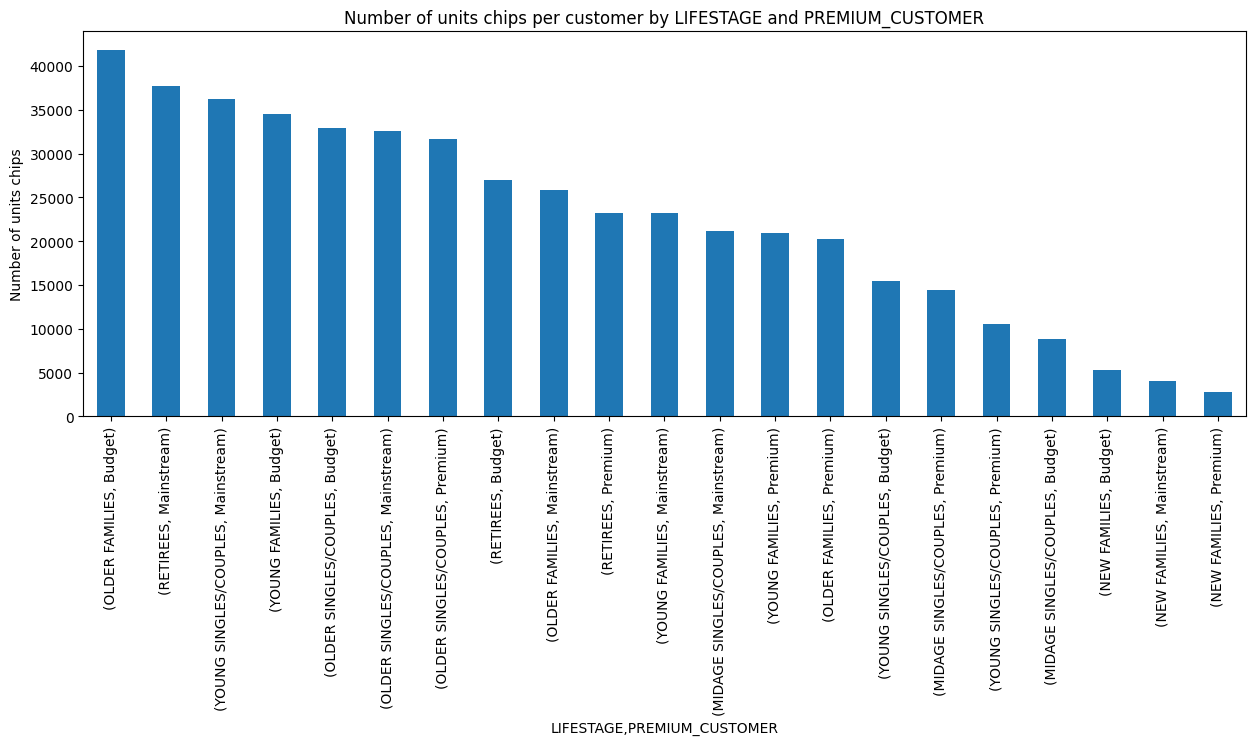

In [50]:
qty_chips= merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
qty_chips_sorted = qty_chips.sort_values(ascending=False)

plt.figure(figsize=(15,5))
qty_chips_sorted.plot(kind='bar')
plt.title('Number of units chips per customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.ylabel('Number of units chips')
plt.show()

**Commentaires:** On remarque que les catégories : Older Families-Budget, Retirees-Mainstream et Young singles/couples-Mainstream achètent plus de chips.

→ Donc, une explication possible pour les fortes ventes pour la catégorie Older Families-Budget est que les clients de cette catégorie achètent plus de paquets que les autres.

Donc, c'est une question de comportement d’achat, pas de volume de clients.

**Vérifions combien d’unités en moyenne chaque client achète, selon son groupe LIFESTAGE et PREMIUM_CUSTOMER**

In [51]:
avg_units_per_customer = qty_chips / nbr_customers

avg_units_per_customer

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              6.026459
                        Mainstream          6.432080
                        Premium             6.078514
NEW FAMILIES            Budget              4.821527
                        Mainstream          4.891566
                        Premium             4.815652
OLDER FAMILIES          Budget              9.076773
                        Mainstream          9.255380
                        Premium             9.071717
OLDER SINGLES/COUPLES   Budget              6.781398
                        Mainstream          6.712021
                        Premium             6.769543
RETIREES                Budget              6.141847
                        Mainstream          5.925920
                        Premium             6.103358
YOUNG FAMILIES          Budget              8.722995
                        Mainstream          8.638361
                        Premium             8.716013
YOUNG SINGLES/COUPLES   Budget              4.250069
                        Mainstream          4.575597
                        Premium             4.264113
dtype: float64

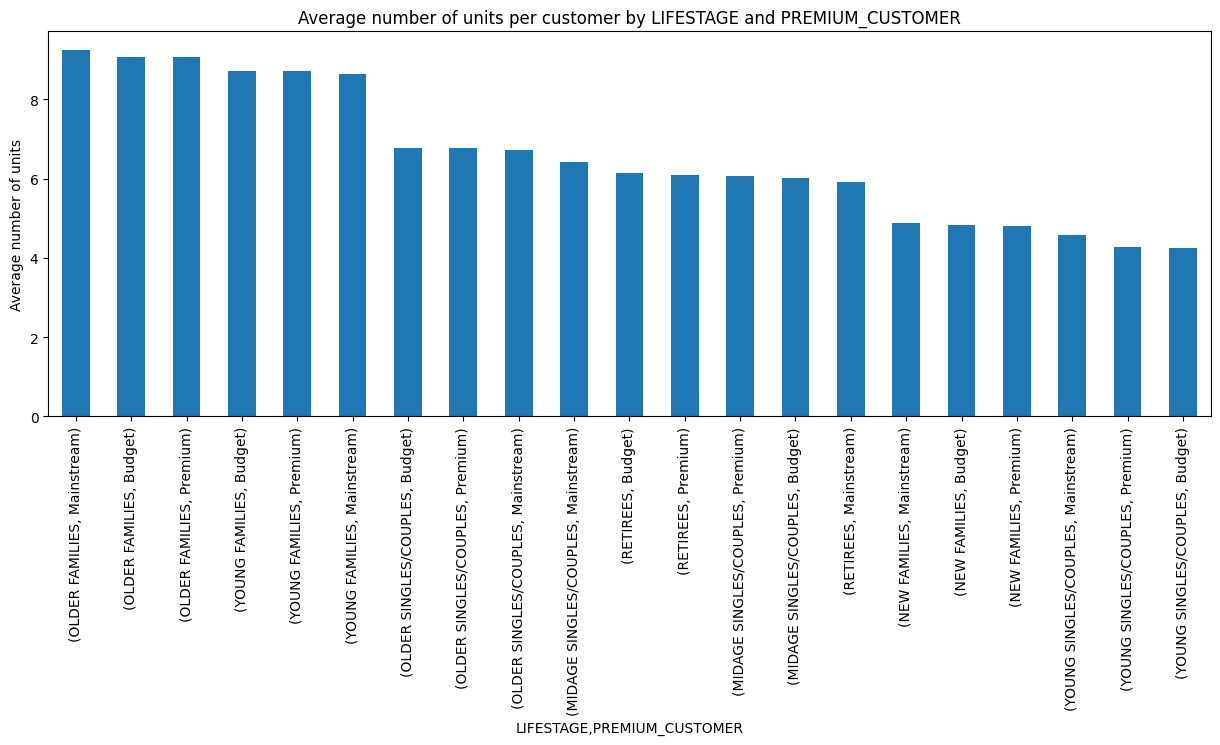

In [52]:
plt.figure(figsize=(15,5))
avg_units_per_customer_sorted = avg_units_per_customer.sort_values(ascending=False)
avg_units_per_customer_sorted.plot(kind='bar')
plt.title('Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.ylabel('Average number of units')
plt.show()

**Commentaires:** Les catégories Older families and young families achètent en moyenne plus de chips par client.

**What's the average chip price by customer segment?**

In [63]:
avg_chip_price = grouped_sales / qty_chips

avg_chip_price.sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          4.074043
MIDAGE SINGLES/COUPLES  Mainstream          3.994449
NEW FAMILIES            Mainstream          3.935887
RETIREES                Budget              3.932731
NEW FAMILIES            Budget              3.931969
RETIREES                Premium             3.924037
OLDER SINGLES/COUPLES   Premium             3.897698
                        Budget              3.887529
NEW FAMILIES            Premium             3.886168
RETIREES                Mainstream          3.852986
OLDER SINGLES/COUPLES   Mainstream          3.822753
MIDAGE SINGLES/COUPLES  Premium             3.780823
YOUNG FAMILIES          Budget              3.761903
                        Premium             3.759232
MIDAGE SINGLES/COUPLES  Budget              3.753878
OLDER FAMILIES          Budget              3.747969
                        Mainstream          3.736380
YOUNG FAMILIES          Mainstream          3.722439
OLDER FAMILIES          Premium             3.717703
YOUNG SINGLES/COUPLES   Premium             3.692889
                        Budget              3.685297
dtype: float64

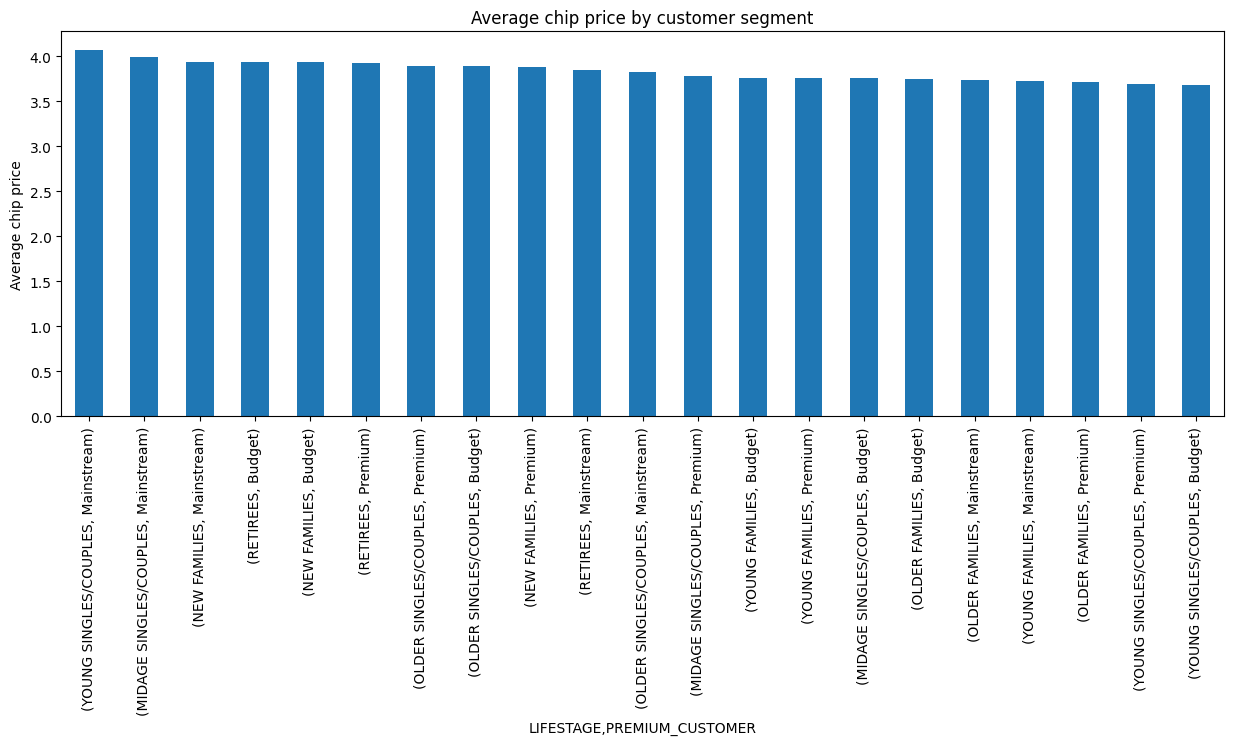

In [64]:
plt.figure(figsize=(15,5))
avg_chip_price_sorted = avg_chip_price.sort_values(ascending=False)
avg_chip_price_sorted.plot(kind='bar')
plt.title('Average chip price by customer segment')
plt.ylabel('Average chip price')
plt.show()

### **Conclusion générale:**

Les 3 groupes avec le plus de ventes au total sont: Older families-Budget, Young singles/couples-Mainstream et Retirees-Mainstream. Cependant, pour Young singles/couples-Mainstream, c'est parce qu'il y a beaucoup plus de clients dans ce groupe.

Pour Older Families-Budget, c'est parce qu'ils achètent beaucoup plus par unité.

Older Retirees-Mainstream ont beaucoup de clients et achètent beaucoup aussi.

Older families – Mainstream n’est pas parmi les groupes avec le plus de ventes au total, mais chaque client de ce groupe achète plus de chips que les autres en moyenne. Ce n’est donc pas un segment volumineux, mais c’est un segment très engagé. Il pourrait générer plus de ventes si sa taille augmentait.

**Tableau Récapitulatif**

In [58]:
merged_data['GROUP'] = merged_data['LIFESTAGE'] + ' - ' + merged_data['PREMIUM_CUSTOMER']

summary = merged_data.groupby('GROUP').agg(
    number_of_customers=('LYLTY_CARD_NBR', 'nunique'),
    total_quantity_purchased=('PROD_QTY', 'sum')
).reset_index()

summary = summary.sort_values(by='total_quantity_purchased', ascending=False)

                                  GROUP  number_of_customers  \
6               OLDER FAMILIES - Budget                 4611   
13                RETIREES - Mainstream                 6358   
19   YOUNG SINGLES/COUPLES - Mainstream                 7917   
15              YOUNG FAMILIES - Budget                 3953   
9        OLDER SINGLES/COUPLES - Budget                 4849   
10   OLDER SINGLES/COUPLES - Mainstream                 4858   
11      OLDER SINGLES/COUPLES - Premium                 4682   
12                    RETIREES - Budget                 4385   
7           OLDER FAMILIES - Mainstream                 2788   
14                   RETIREES - Premium                 3812   
16          YOUNG FAMILIES - Mainstream                 2685   
1   MIDAGE SINGLES/COUPLES - Mainstream                 3298   
17             YOUNG FAMILIES - Premium                 2398   
8              OLDER FAMILIES - Premium                 2231   
18       YOUNG SINGLES/COUPLES - Budget 

In [59]:
summary['avg_qty_per_customer'] = summary['total_quantity_purchased'] / summary['number_of_customers']


In [60]:
summary

,GROUP,number_of_customers,total_quantity_purchased,avg_qty_per_customer
6,OLDER FAMILIES - Budget,4611,41853,9.076773
13,RETIREES - Mainstream,6358,37677,5.925920
19,YOUNG SINGLES/COUPLES - Mainstream,7917,36225,4.575597
15,YOUNG FAMILIES - Budget,3953,34482,8.722995
9,OLDER SINGLES/COUPLES - Budget,4849,32883,6.781398
10,OLDER SINGLES/COUPLES - Mainstream,4858,32607,6.712021
11,OLDER SINGLES/COUPLES - Premium,4682,31695,6.769543
12,RETIREES - Budget,4385,26932,6.141847
7,OLDER FAMILIES - Mainstream,2788,25804,9.255380
14,RETIREES - Premium,3812,23266,6.103358


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
